# Data cleaning basics

Dataquest's _Data cleaning basics_ mission (part of the [_Pandas and Numpy fundamentals_](https://www.dataquest.io/course/pandas-fundamentals/) course) uses Pandas to clean up parts of a dataset on laptops. The mission ends with some additional suggested tasks and questions to explore.

This notebook recreates the examples used in the mission as a way to review them and let them sink in, and also includes the suggested tasks and questions below.

## 1. Course steps

This first section includes importing the data from a CSV, cleaning column names, as well as converting data to numeric types when appropriate and cleaning out some bad data.

In [1]:
# import necessary packages

import numpy as np
import pandas as pd

In [2]:
# import data from CSV as a dataframe

laptops = pd.read_csv('laptops.csv', encoding='Latin-1')

In [3]:
laptops.shape

(1303, 13)

In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Manufacturer                1303 non-null object
Model Name                  1303 non-null object
Category                    1303 non-null object
Screen Size                 1303 non-null object
Screen                      1303 non-null object
CPU                         1303 non-null object
RAM                         1303 non-null object
 Storage                    1303 non-null object
GPU                         1303 non-null object
Operating System            1303 non-null object
Operating System Version    1133 non-null object
Weight                      1303 non-null object
Price (Euros)               1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


All columns have string (object) data, even though several are clearly numeric in nature.

We can confirm this by examining the first rows in each column.

In [5]:
laptops.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


### Cleaning up the column titles

The column titles are a mess. There is inconsistent capitalization, spaces, and other issues.

In [6]:
columns = laptops.columns

In [7]:
print(columns)

updated_columns = []
for c in columns:
    c = c.strip()
    c = c.lower()
    c = c.replace(' ','')
    c = c.replace('(','')
    c = c.replace(')','')
    updated_columns.append(c)
    
columns = updated_columns
print(columns)
    

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')
['manufacturer', 'modelname', 'category', 'screensize', 'screen', 'cpu', 'ram', 'storage', 'gpu', 'operatingsystem', 'operatingsystemversion', 'weight', 'priceeuros']


In [8]:
columns[1] = 'model'
columns[9] = 'os'
columns[10] = 'os_version'
columns[-1] = 'price_eu'

print(columns)

['manufacturer', 'model', 'category', 'screensize', 'screen', 'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_eu']


In [9]:
laptops.columns = columns
print(laptops.columns)

Index(['manufacturer', 'model', 'category', 'screensize', 'screen', 'cpu',
       'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_eu'],
      dtype='object')


### Converting numeric columns to numeric formats

As it now stands all columns are of the "object" dtype, meaning they're stored as strings. Some values, such as RAM amounts, are clearly numeric in nature.
We'll convert those columns to the appropriate formats. In some cases this will require that we edit values, for example when removing units.

In [10]:
laptops.head(3)

,manufacturer,model,category,screensize,screen,cpu,ram,storage,gpu,os,os_version,weight,price_eu
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"


Screensize, ram, weight and price are all numeric data.

#### Converting 'screensize'

In [11]:
laptops['screensize'].value_counts(dropna=False)

15.6"    665
14.0"    197
17.3"    164
13.3"    164
12.5"     39
11.6"     33
12.0"      6
13.9"      6
13.5"      6
12.3"      5
15.4"      4
10.1"      4
15.0"      4
13.0"      2
14.1"      1
11.3"      1
17.0"      1
18.4"      1
Name: screensize, dtype: int64

Without exceptions, all values in the screensize columns are made up of three digits and a unit. We can drop the unit and convert the dtype to float.
To avoid losing any data, we'll include the unit the column title.

In [12]:
laptops['screensize'] = laptops['screensize'].str[:4]
laptops['screensize'] = laptops['screensize'].astype(float)
laptops['screensize'].value_counts(dropna=False)

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.9      6
13.5      6
12.0      6
12.3      5
15.4      4
10.1      4
15.0      4
13.0      2
18.4      1
14.1      1
17.0      1
11.3      1
Name: screensize, dtype: int64

In [13]:
columns = laptops.columns

In [14]:
# Renaming the screensize column to make sure that no information is lost.
print(columns)
columns = ['manufacturer', 'model', 'category', 'screensize_in', 'screen', 'cpu',
       'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_eu']
print(columns)

Index(['manufacturer', 'model', 'category', 'screensize', 'screen', 'cpu',
       'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_eu'],
      dtype='object')
['manufacturer', 'model', 'category', 'screensize_in', 'screen', 'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_eu']


Next, let's turn our attention to ram.

In [15]:
laptops['ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: ram, dtype: int64

#### converting 'ram'

The format is very similar to what we saw with screensize. We will remove the units but put them in the column label to prevent any loss of information, and convert the values to floats.

In [16]:
laptops['ram'] = laptops['ram'].str.replace('GB','').astype(float)
columns = ['manufacturer', 'model', 'category', 'screensize_in', 'screen', 'cpu',
       'ram_gb', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_eu']


In [17]:
laptops['ram'].value_counts()

8.0     619
4.0     375
16.0    200
6.0      41
12.0     25
2.0      22
32.0     17
24.0      3
64.0      1
Name: ram, dtype: int64

#### Converting the 'weight' column

The 'weight' column is in a similar situation. Again, we will rename the label and convert the values to floats after having removed the units.

In [20]:
# note that there is one entry where the weight is given as "4kgs",
# so a step to remove "kgs" as well as "kg" was needed.

laptops['weight'] = laptops['weight'].str.replace('kgs','').str.replace('kg','').astype(float)
columns = ['manufacturer', 'model', 'category', 'screensize_in', 'screen', 'cpu',
       'ram_gb', 'storage', 'gpu', 'os', 'os_version', 'weight_kg', 'price_eu']

#### Converting the 'price' column

Finally, the price column should get a similar treatment.

In [25]:
laptops['price_eu'] = laptops['price_eu'].str.replace(',','.')

In [27]:
laptops['price_eu'] = laptops['price_eu'].astype(float)

In [28]:
laptops['price_eu'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: price_eu, dtype: float64

We can see from the fact that the describe method now returns summary statistics that this series has been successfully converted to a float type.

## Cleaning up the GPU column



In [31]:
laptops['gpu'].head(10)

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
5                   AMD Radeon R5
6         Intel Iris Pro Graphics
7          Intel HD Graphics 6000
8            Nvidia GeForce MX150
9          Intel UHD Graphics 620
Name: gpu, dtype: object

The structure of this column is manufacturer name, followed by some kind of model name or number. Let's extract out the manufacturers.

In [34]:
laptops['gpu_manufacturer'] = laptops['gpu'].str.split().str[0]

In [39]:
laptops['gpu_manufacturer'].value_counts(dropna=False, normalize=True)

Intel     0.554106
Nvidia    0.306984
AMD       0.138143
ARM       0.000767
Name: gpu_manufacturer, dtype: float64

Reassuringly, all entries in this new column are correct, well-formatted manufacturer names. In passing, we also learned that more than half of GPUs for the laptops in this dataset are manufactured by Intel.

Let's do something similar for the 'cpu' column.

In [40]:
laptops['cpu_manufacturer'] = laptops['cpu'].str.split().str[0]
laptops['cpu_manufacturer'].value_counts(dropna=False, normalize=True)

Intel      0.951650
AMD        0.047583
Samsung    0.000767
Name: cpu_manufacturer, dtype: float64

## Cleaning the OS data

In [45]:
laptops.loc[:,['os', 'os_version']].head(10)

,os,os_version
0,macOS,NaN
1,macOS,NaN
2,No OS,NaN
3,macOS,NaN
4,macOS,NaN
5,Windows,10
6,Mac OS,X
7,macOS,NaN
8,Windows,10
9,Windows,10


In [48]:
laptops['os'].value_counts(dropna=False)

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: os, dtype: int64

We know that 'macOS' and 'Mac OS' both refer to the same thing. Having two labels can be an issue when calculating which OSs are most popular.

To solve this issue let's replace both values with 'macOS'.

In [50]:
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}

laptops['os'] = laptops['os'].map(mapping_dict)

In [51]:
laptops['os'].value_counts(dropna=False)

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os, dtype: int64

In [49]:
laptops['os_version'].value_counts(dropna=False)

10      1072
NaN      170
7         45
X          8
10 S       8
Name: os_version, dtype: int64

In [52]:
laptops['os_version'].isnull().sum()

170

This is the only column in this dataframe that has an null values.

This raises the question of how to respond to this situation. Whether we should remove these rows, enter some value, or eliminate the column altogether.

If this data were to be used for machine learning, dropping some entries would make sense, but as no such use is currently planned, we'll just leave these entries alone for now.

In some cases, the value in the 'os' column, is 'No OS'. In that case it makes no sense to talk about an OS version. In those cases we will replace the NaNs with 'Version Unknown', but otherwise we will leave the 'os_version' column and the rows with NaNs as they are.

In [53]:
laptops.loc[laptops['os']=='No OS', 'os_version'] = ('Version Unknown')

In [54]:
laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()

Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

This is the end of the steps explicitly carried out in the courseware. The exception is the work done on the 'weight' and 'price_euros' columns which weren't modified in the course but which we converted here.

Next, let's consider the suggested expansion tasks.

## 2. Expansion work

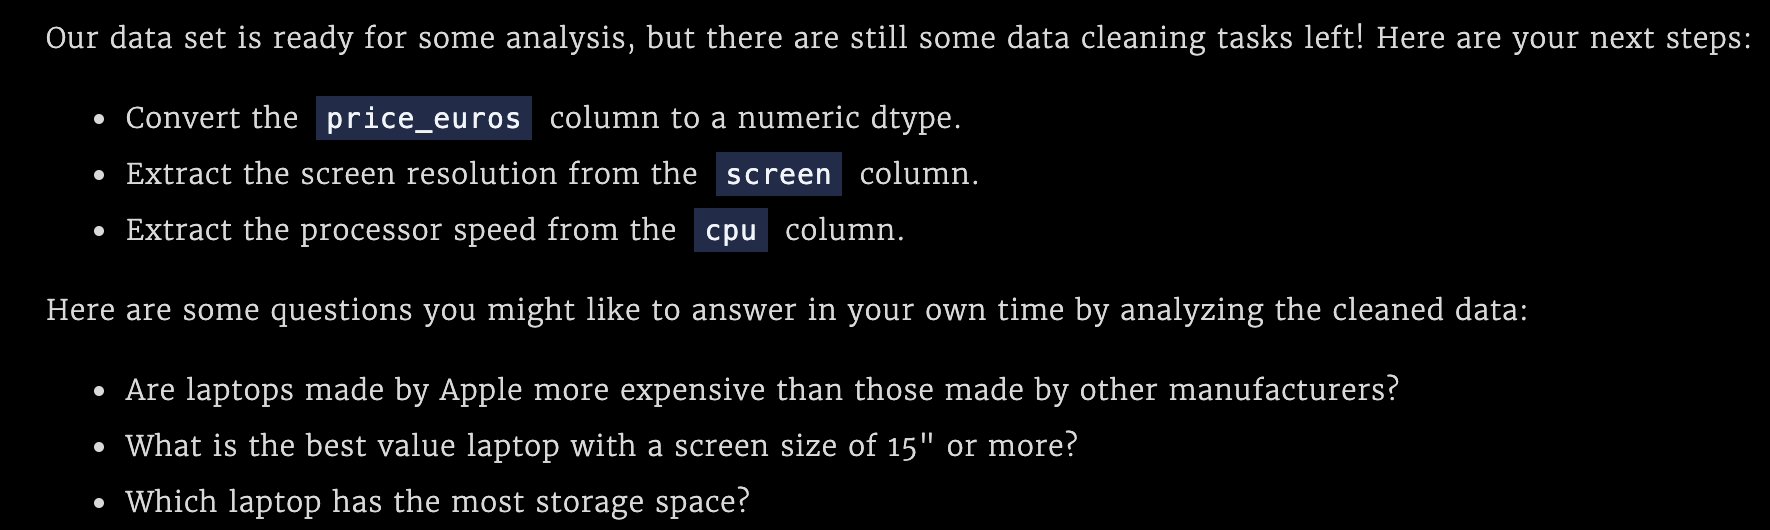

<img src="image.png" width="800" />



We've already dealt with the price column above.

#### Extracting the screen resolution

In [71]:
laptops['screen'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

All screen rows have the same format which ends with the resolution. We can extract this information in a similar way to what we did for CPUs and GPUs.

In [57]:
laptops['screen_res'] = laptops['screen'].str.split().str[-1]

In [58]:
laptops['screen_res'].head(10)

0    2560x1600
1     1440x900
2    1920x1080
3    2880x1800
4    2560x1600
5     1366x768
6    2880x1800
7     1440x900
8    1920x1080
9    1920x1080
Name: screen_res, dtype: object

#### Extracting the CPU speed

In [60]:
laptops['cpu_speed'] = laptops['cpu'].str.split().str[-1]

In [62]:
laptops['cpu_speed'].value_counts()

2.5GHz     290
2.8GHz     165
2.7GHz     165
1.6GHz     133
2.3GHz      86
1.8GHz      78
2.6GHz      76
2GHz        67
1.1GHz      53
2.4GHz      52
2.9GHz      21
2.0GHz      19
3GHz        19
1.2GHz      15
1.44GHz     12
2.2GHz      11
1.5GHz      10
1.3GHz       6
3.6GHz       5
0.9GHz       4
2.1GHz       3
3.1GHz       3
2.50GHz      3
1.9GHz       2
1.0GHz       1
2.70GHz      1
1.92GHz      1
3.2GHz       1
1.60GHz      1
Name: cpu_speed, dtype: int64

## Answering questions with the data

### 1. Are laptops made by Apple more expensive than those made by other manufacturers?

To answer this question let's separate out Apple and non-Apple laptops and examine the key statistics of their prices.



In [65]:
apple_laptops = laptops.loc[laptops['manufacturer']=='Apple', 'price_eu']
non_apple_laptops = laptops.loc[laptops['manufacturer']!='Apple', 'price_eu']

In [68]:
# quick sanity check of the resulting dataframes

print(apple_laptops.shape[0])
print(non_apple_laptops.shape[0])
print(laptops.shape[0])

21
1282
1303


In [69]:
apple_laptops.describe()

count      21.000000
mean     1564.198571
std       561.623595
min       898.940000
25%      1163.000000
50%      1339.690000
75%      1958.900000
max      2858.000000
Name: price_eu, dtype: float64

In [70]:
non_apple_laptops.describe()

count    1282.000000
mean     1116.471123
std       698.903305
min       174.000000
25%       598.000000
50%       959.500000
75%      1478.500000
max      6099.000000
Name: price_eu, dtype: float64

The answer to this question is nuanced. Apple laptops have a higher average price (1564.20 Euro) than the non-Apple laptops (1116.47 Euro), but the range of non-Apple laptop prices is much greater. The most expensive non-Apple laptop bring with it a pricetag of over 6000 Euros!

### 2. What is the best value laptop with a screen size of 15" or more?

This question requires some interpretation. We will assume here that the best value laptop is the cheapest one that meets the screensize requirement. We will filter out the laptops that meet the size requirement and then select the one(s) with the lowest price.

In [77]:
fifteen_inch = laptops.loc[laptops['screensize'] >= 15,: ]
best_value = fifteen_inch.loc[fifteen_inch['price_eu'] == fifteen_inch['price_eu'].min(),:]
print(best_value['model'])

290    Chromebook C910-C2ST
Name: model, dtype: object


It turns out the best value laptop with a screen 15 inches or greater is a Chromebook C910-C2ST.


### 3. Which laptop has the most storage space?

Next we look for the laptop(s) with the most storage space. 

In [83]:
most_storage = laptops.loc[laptops['storage']== laptops['storage'].max(),:]
print(most_storage[['model', 'storage', 'price_eu']])

            model  storage  price_eu
950  ZBook Studio  8GB SSD    2249.0


The laptop with the most storage is the ZBook Studio, with an 8GB SSD at a price of 2249 Euro.

